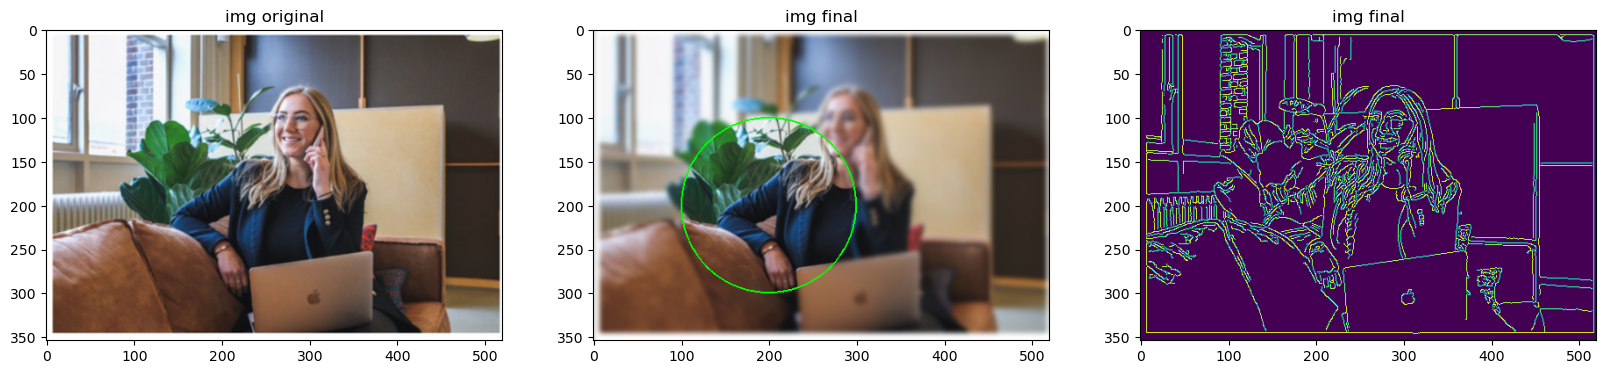

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque_sector_invertido(img, centro, x, y):
    img1 = np.copy(img) 

    valx, valy = centro
    mediox = x // 2
    medioy = y // 2
    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)
    cv2.ellipse(img1, (valx, valy), (mediox, medioy), 0, 0, 360, (0, 255, 0), 2)
    mascara_invertida = cv2.bitwise_not(mascara)
    desenfoque = cv2.GaussianBlur(img, (15, 15), 0)
    img1[mascara_invertida != 0] = desenfoque[mascara_invertida != 0]
    
    return img1

imagen = cv2.imread('img.png')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(imagen, 50, 150)
img_fin = desenfoque_sector_invertido(imagen, (200, 200), 200, 200)


plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.title("img original")
plt.imshow(imagen)

plt.subplot(132)
plt.title("img final")
plt.imshow(img_fin)
plt.subplot(133)
plt.title("img final")
plt.imshow(canny)

plt.show()


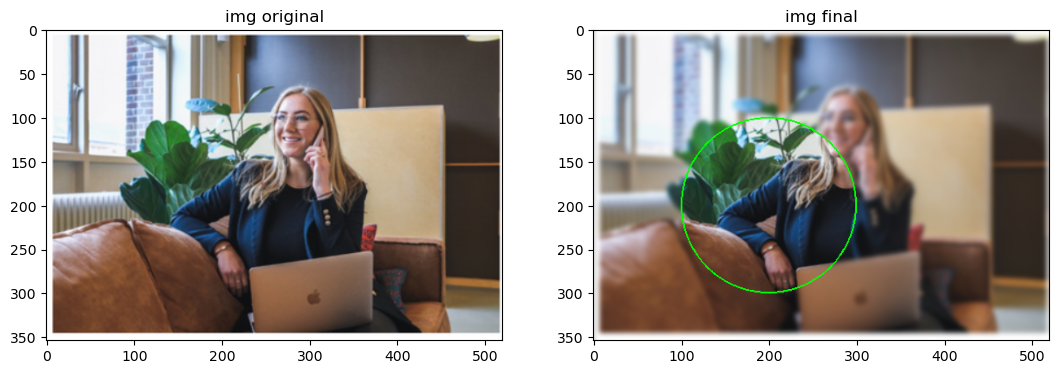

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque_sector_invertido(img, centro, x, y):
    img1 = np.copy(img) 

    valx, valy = centro
    mediox = x // 2
    medioy = y // 2
    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)
    cv2.ellipse(img1, (valx, valy), (mediox, medioy), 0, 0, 360, (0, 255, 0), 2)
    mascara_invertida = cv2.bitwise_not(mascara)
    desenfoque = cv2.GaussianBlur(img, (15, 15), 0)
    img1[mascara_invertida != 0] = desenfoque[mascara_invertida != 0]
    
    return img1

imagen = cv2.imread('img.png')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
img_fin = desenfoque_sector_invertido(imagen, (200, 200), 200, 200)


plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.title("img original")
plt.imshow(imagen)

plt.subplot(132)
plt.title("img final")
plt.imshow(img_fin)


plt.show()


In [3]:
from rembg import remove 
from PIL import Image 
import sys

def main():
    # Verificar que se proporcionen los argumentos adecuados
    if len(sys.argv) < 3:
        print("Usage: python remove_background.py input_path output_path")
        return

    # Obtener rutas de entrada y salida desde los argumentos de la línea de comandos
    input_path = sys.argv[1]
    output_path = sys.argv[2]

    # Abrir la imagen de entrada
    input_image = Image.open(input_path)

    # Eliminar el fondo de la imagen
    output_image = remove(input_image)

    # Guardar la imagen resultante
    output_image.save(output_path)

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'rembg'

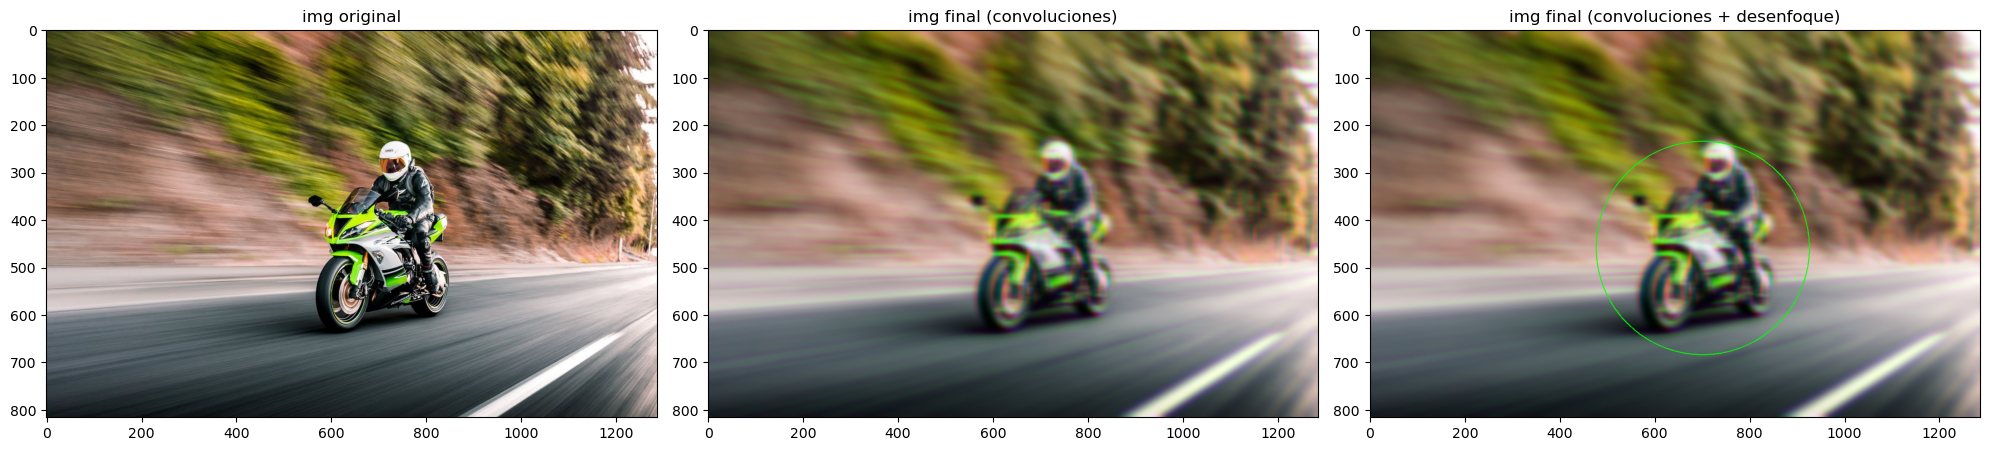

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def conv_vertical(img, mask_size):
    mask = np.ones((mask_size, 1), np.float32) / mask_size
    img_conv = cv2.filter2D(img, -1, mask)
    return cv2.GaussianBlur(img_conv, (15, 15), 0)

def conv_horizontal(img, mask_size):
    mask = np.ones((1, mask_size), np.float32) / mask_size
    img_conv = cv2.filter2D(img, -1, mask)
    return cv2.GaussianBlur(img_conv, (15, 15), 0)

def conv_diagonal(img, mask_size):
    mask = np.eye(mask_size, dtype=np.float32) / mask_size
    img_conv = cv2.filter2D(img, -1, mask)
    return cv2.GaussianBlur(img_conv, (15, 15), 0)

def desenfoque_sector_invertido(img, centro, x, y):
    img1 = np.copy(img) 

    valx, valy = centro
    mediox = x // 2
    medioy = y // 2
    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)
    cv2.ellipse(img1, (valx, valy), (mediox, medioy), 0, 0, 360, (0, 255, 0), 2)
    mascara_invertida = cv2.bitwise_not(mascara)
    desenfoque = cv2.GaussianBlur(img, (15, 15), 0)
    img1[mascara_invertida != 0] = desenfoque[mascara_invertida != 0]
    
    return img1

image = cv2.imread('moto.jpg')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask_size_vertical = 25
mask_size_horizontal = 25
mask_size_diagonal = 25

img_r_vertical = conv_vertical(img_rgb[:,:,0], mask_size_vertical)
img_g_horizontal = conv_horizontal(img_rgb[:,:,1], mask_size_horizontal)
img_b_diagonal = conv_diagonal(img_rgb[:,:,2], mask_size_diagonal)

img_combined = np.stack([img_r_vertical, img_g_horizontal, img_b_diagonal], axis=2)

img_fin = desenfoque_sector_invertido(img_combined, (700, 460), 450, 450)

plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.title("img original")
plt.imshow(img_rgb)


plt.subplot(132)
plt.title("img final (convoluciones)")
plt.imshow(img_combined)


plt.subplot(133)
plt.title("img final (convoluciones + desenfoque)")
plt.imshow(img_fin)


plt.tight_layout()
plt.show()


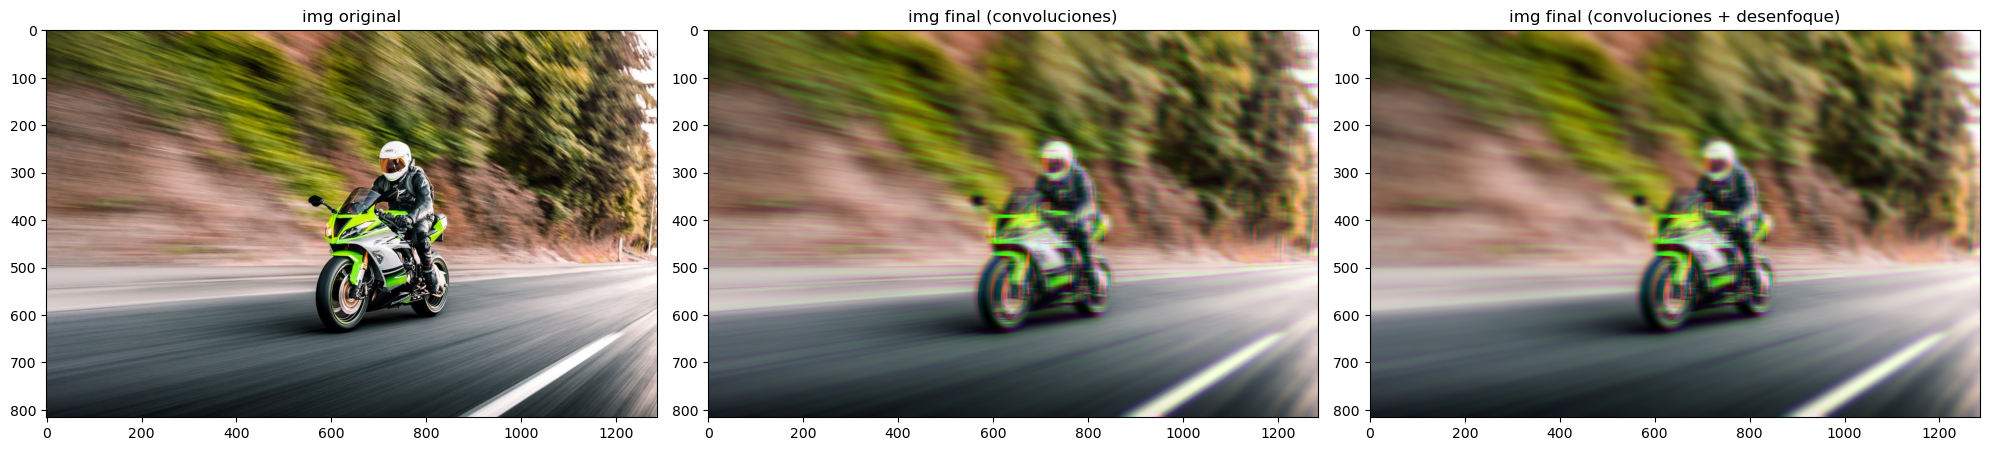

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def conv_vertical(img, mask_size):
    mask = np.ones((mask_size, 1), np.float32) / mask_size
    img_conv = cv2.filter2D(img, -1, mask)
    return img_conv

def conv_horizontal(img, mask_size):
    mask = np.ones((1, mask_size), np.float32) / mask_size
    img_conv = cv2.filter2D(img, -1, mask)
    return img_conv

def conv_diagonal(img, mask_size):
    mask = np.eye(mask_size, dtype=np.float32) / mask_size
    img_conv = cv2.filter2D(img, -1, mask)
    return img_conv

def desenfoque_sector_invertido(img, centro, x, y):
    img1 = np.copy(img) 

    valx, valy = centro
    mediox = x // 2
    medioy = y // 2
    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)
    
    # Aplicar desenfoque solo fuera del círculo
    desenfoque = cv2.GaussianBlur(img, (15, 15), 0)
    img1[mascara == 0] = desenfoque[mascara == 0]
    
    return img1

image = cv2.imread('moto.jpg')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask_size_vertical = 25
mask_size_horizontal = 25
mask_size_diagonal = 25

img_r_vertical = conv_vertical(img_rgb[:,:,0], mask_size_vertical)
img_g_horizontal = conv_horizontal(img_rgb[:,:,1], mask_size_horizontal)
img_b_diagonal = conv_diagonal(img_rgb[:,:,2], mask_size_diagonal)

img_combined = np.stack([img_r_vertical, img_g_horizontal, img_b_diagonal], axis=2)

img_fin = desenfoque_sector_invertido(img_combined, (800, 500), 400, 400)

plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.title("img original")
plt.imshow(img_rgb)


plt.subplot(132)
plt.title("img final (convoluciones)")
plt.imshow(img_combined)


plt.subplot(133)
plt.title("img final (convoluciones + desenfoque)")
plt.imshow(img_fin)


plt.tight_layout()
plt.show()
